
Getting data - Setup Data - Training and Test

In [45]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True, as_frame=True)


        


X.head()        # to get a feeling of data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
y.head()        #Data targets

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

adding a column of 1 to training and test data

In [48]:
X_train.insert(0, "Dummy", np.ones(X_train.shape[0]))
X_test.insert(0, "Dummy", np.ones(X_test.shape[0]))


features_size = X_train.shape[1]  # Extracting the number of features



In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy(y_train)
y_test = y_test.to_numpy(y_test)


Sigmoid Function

In [50]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

Training using Logistic Regression

In [51]:


w = np.zeros(features_size)
learning_rate = 0.01
N = X_train.shape[0]
delta_E = 20*np.ones(features_size)
threshold = 20
theta = 0.5
num_of_iterations = 0
while np.linalg.norm(delta_E) >= threshold:
    
    predicted_class = []
    delta_E = 0
    for i in range(N):
        delta_E += -1/N * (y_train[i]*X_train[i][:].T) / (1+np.exp(y_train[i]*w.T@X_train[i][:].T))
        
    w = w - learning_rate * delta_E

    Error_zero_one = 0
    for i in range(N):
        predicted_class.append(1 if sigmoid(w.T@X_train[i][:].T) >= theta else 0)
        if y_train[i] != predicted_class[i]:
            Error_zero_one += 1
    num_of_iterations += 1



    



    



ROC

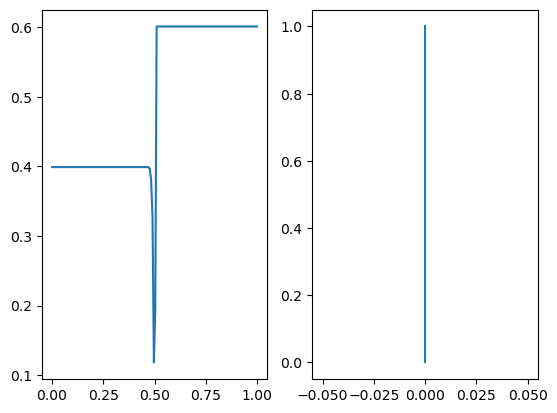

In [52]:
theta = np.linspace(0,1,150)
Sens_arr = []
Spec_arr = []
miss_classification_rate = []
for theta_i in theta:
    predicted_class = []
    for i in range(N):
        
        predicted_class.append(1 if sigmoid(w.T@X_train[i][:].T) >= theta_i else 0)
        
        
    # print(Error_zero_one)
    # Compute True Positive
    TP = 0
    FP = 0
    Pos = 0
    Neg = 0
    for i in range(N):
        if y_train[i] == predicted_class[i] & y_train[i] == 1:
            TP += 1
        if y_train[i] != predicted_class[i] & y_train[i] == 1:
            FP += 1
            print("Here")
        if y_train[i] == 1:
            Pos += 1
        if y_train[i] == 0:
            Neg += 1
    Sens_arr.append(TP/Pos)
    Spec_arr.append(FP/Neg)
    Err = 0
    for i in range(N):
        if y_train[i] != predicted_class[i]:
                Err += 1
    miss_classification_rate.append(Err/(Pos+Neg))
    # print(Error_zero_one/(Pos+Neg))


fig, ax = plt.subplots(1, 2)

ax[0].plot(theta.T, miss_classification_rate)
ax[1].plot(Spec_arr, Sens_arr)
plt.show()



In [53]:
Spec_arr[20:30]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Logistic Regression with Sci-kit

In [66]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=0).fit(X_train, y_train)

THRESHOLD = 0.5
theta = np.linspace(0,1,150)
Sens_arr = []
Spec_arr = []
miss_classification_rate = []
print(clf.predict_proba(X_train).shape)

preds = np.where(clf.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)


for THRESHOLD in theta:
    preds = np.where(clf.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)
    TP = 0
    FP = 0
    Pos = 0
    Neg = 0
    for i in range(N):
        if y_train[i] == preds[i] & y_train[i] == 1:
            TP += 1
        if y_train[i] != preds[i] & y_train[i] == 1:
            FP += 1
            print("Here")
        if y_train[i] == 1:
            Pos += 1
            print("Here")
        if y_train[i] == 0:
            Neg += 1
            print("Here")
        Sens_arr.append(TP/Pos)
        Spec_arr.append(FP/Neg)
        Err = 0
        for i in range(N):
            if y_train[i] != preds[i]:
                    Err += 1
    miss_classification_rate.append(Err/(Pos+Neg))

fig, ax = plt.subplots(1, 2)

ax[0].plot(theta.T, miss_classification_rate)
ax[1].plot(Spec_arr, Sens_arr)
plt.show()

(381, 2)
Here


ZeroDivisionError: division by zero